##### Agnieszka Marciszewska

# Machine Learning
## Assigment 4
#### Perform some experiments with recurrent neural networks, for example using Keras.

In [6]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.preprocessing import sequence
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#### Table of contents: <a class="anchor" id="toc"></a>
* [Download and prepare data](#data)
* [Model 1](#model1) 
* [Model 2](#model2) 
* [Model 3](#model3) 
* [Model 4](#model4) 
* [Model 5](#model5) 
* [Compariosn of models](#compare)

## Download and prepare data  <a class="anchor" id="data"></a>

In [12]:
word_index = imdb.get_word_index()
print(len(word_index))

88584


In [13]:
vocab_size = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [14]:
max_words = 400

In [15]:
x_train = sequence.pad_sequences(x_train, padding='post', maxlen=max_words)
x_test = sequence.pad_sequences(x_test, padding='post', maxlen=max_words)

In [16]:
review_len_train = []
review_len_test = []
for i in x_train:
    review_len_train.append(len(i))
for i in x_test:
    review_len_train.append(len(i))  
    
print(max(review_len_train),max(review_len_train))

400 400


## Model 1 <a class="anchor" id="model1"></a>

In [17]:
batch_size = 64
ep = 10
embd_len = 32

In [18]:
RNN_model1 = Sequential(name="Simple_RNN")
RNN_model1.add(Embedding(vocab_size,embd_len,input_length=max_words))
RNN_model1.add(SimpleRNN(128,activation='tanh'))
RNN_model1.add(Dense(1, activation='sigmoid'))

RNN_model1.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

history1 = RNN_model1.fit(x_train, y_train,batch_size=batch_size,epochs=ep,
                          validation_data=(x_test, y_test))



Epoch 1/10
391/391 [==============================] - 42s 106ms/step - loss: 0.6983 - accuracy: 0.4992 - val_loss: 0.6995 - val_accuracy: 0.5169
Epoch 2/10
391/391 [==============================] - 39s 99ms/step - loss: 0.6965 - accuracy: 0.5119 - val_loss: 0.6959 - val_accuracy: 0.5026
Epoch 3/10
391/391 [==============================] - 39s 100ms/step - loss: 0.6930 - accuracy: 0.5145 - val_loss: 0.6928 - val_accuracy: 0.5234
Epoch 4/10
391/391 [==============================] - 39s 100ms/step - loss: 0.6881 - accuracy: 0.5232 - val_loss: 0.6882 - val_accuracy: 0.5138
Epoch 5/10
391/391 [==============================] - 40s 102ms/step - loss: 0.6863 - accuracy: 0.5271 - val_loss: 0.6922 - val_accuracy: 0.5071
Epoch 6/10
391/391 [==============================] - 40s 104ms/step - loss: 0.6911 - accuracy: 0.5212 - val_loss: 0.6954 - val_accuracy: 0.5084
Epoch 7/10
391/391 [==============================] - 40s 103ms/step - loss: 0.6862 - accuracy: 0.5247 - val_loss: 0.6988 - val_acc

[Back to table of contents](#toc)

## Model 2 - different optimizer <a class="anchor" id="model2"></a>

In [19]:
RNN_model2 = Sequential(name="Simple_RNN")
RNN_model2.add(Embedding(vocab_size,embd_len,input_length=max_words))
RNN_model2.add(SimpleRNN(128,activation='tanh'))
RNN_model2.add(Dense(1, activation='sigmoid'))

RNN_model2.compile(loss="binary_crossentropy",optimizer='sgd',metrics=['accuracy'])

history2 = RNN_model2.fit(x_train, y_train,batch_size=batch_size,epochs=ep,
                          validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 39s 99ms/step - loss: 0.6942 - accuracy: 0.4983 - val_loss: 0.6931 - val_accuracy: 0.5012
Epoch 2/10
391/391 [==============================] - 40s 102ms/step - loss: 0.6932 - accuracy: 0.5048 - val_loss: 0.6931 - val_accuracy: 0.5018
Epoch 3/10
391/391 [==============================] - 42s 106ms/step - loss: 0.6929 - accuracy: 0.5076 - val_loss: 0.6935 - val_accuracy: 0.5040
Epoch 4/10
391/391 [==============================] - 39s 101ms/step - loss: 0.6926 - accuracy: 0.5138 - val_loss: 0.6937 - val_accuracy: 0.5038
Epoch 5/10
391/391 [==============================] - 40s 102ms/step - loss: 0.6924 - accuracy: 0.5102 - val_loss: 0.6930 - val_accuracy: 0.5084
Epoch 6/10
391/391 [==============================] - 41s 104ms/step - loss: 0.6922 - accuracy: 0.5109 - val_loss: 0.6933 - val_accuracy: 0.5038
Epoch 7/10
391/391 [==============================] - 41s 105ms/step - loss: 0.6918 - accuracy: 0.5129 - val_loss: 0.6936 - val_acc

[Back to table of contents](#toc)

## Model 3 - different activation function <a class="anchor" id="model3"></a>

In [20]:
RNN_model3 = Sequential(name="Simple_RNN")
RNN_model3.add(Embedding(vocab_size,embd_len,input_length=max_words))
RNN_model3.add(SimpleRNN(128,activation='relu'))
RNN_model3.add(Dense(1, activation='sigmoid'))

RNN_model3.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

history3 = RNN_model3.fit(x_train, y_train,batch_size=batch_size,epochs=ep,
                          validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 38s 95ms/step - loss: 0.6903 - accuracy: 0.5105 - val_loss: 0.6870 - val_accuracy: 0.5146
Epoch 2/10
391/391 [==============================] - 37s 95ms/step - loss: nan - accuracy: 0.5290 - val_loss: nan - val_accuracy: 0.5000
Epoch 3/10
391/391 [==============================] - 37s 95ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 4/10
391/391 [==============================] - 38s 98ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 5/10
391/391 [==============================] - 37s 95ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 6/10
391/391 [==============================] - 37s 95ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 7/10
391/391 [==============================] - 37s 95ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 8/10
391/391 [========

[Back to table of contents](#toc)

## Model 4 - different embedding value <a class="anchor" id="model4"></a>

In [21]:
RNN_model4 = Sequential(name="Simple_RNN")
RNN_model4.add(Embedding(vocab_size,64,input_length=max_words))
RNN_model4.add(SimpleRNN(128,activation='tanh'))
RNN_model4.add(Dense(1, activation='sigmoid'))

RNN_model4.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
history4 = RNN_model4.fit(x_train, y_train,batch_size=batch_size,epochs=ep,
                          validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 43s 108ms/step - loss: 0.6988 - accuracy: 0.5027 - val_loss: 0.6944 - val_accuracy: 0.5016
Epoch 2/10
391/391 [==============================] - 41s 106ms/step - loss: 0.6951 - accuracy: 0.5058 - val_loss: 0.6934 - val_accuracy: 0.5045
Epoch 3/10
391/391 [==============================] - 40s 103ms/step - loss: 0.6945 - accuracy: 0.5058 - val_loss: 0.6937 - val_accuracy: 0.5005
Epoch 4/10
391/391 [==============================] - 41s 104ms/step - loss: 0.6947 - accuracy: 0.5074 - val_loss: 0.7077 - val_accuracy: 0.4990
Epoch 5/10
391/391 [==============================] - 40s 102ms/step - loss: 0.6913 - accuracy: 0.5216 - val_loss: 0.6928 - val_accuracy: 0.5075
Epoch 6/10
391/391 [==============================] - 40s 102ms/step - loss: 0.6882 - accuracy: 0.5262 - val_loss: 0.6964 - val_accuracy: 0.5073
Epoch 7/10
391/391 [==============================] - 41s 104ms/step - loss: 0.6803 - accuracy: 0.5278 - val_loss: 0.6940 - val_ac

[Back to table of contents](#toc)

## Model 5 - two RNN layer  <a class="anchor" id="model5"></a>

In [22]:
RNN_model5 = Sequential(name="Simple_RNN")
RNN_model5.add(Embedding(vocab_size,embd_len,input_length=max_words))
RNN_model5.add(SimpleRNN(128,activation='tanh',return_sequences=True))
RNN_model5.add(SimpleRNN(128,activation='tanh',return_sequences=False))
RNN_model5.add(Dense(1, activation='sigmoid'))

RNN_model5.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
history5 = RNN_model5.fit(x_train, y_train,batch_size=batch_size,epochs=ep,
                          validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 89s 224ms/step - loss: 0.7089 - accuracy: 0.4946 - val_loss: 0.6984 - val_accuracy: 0.5036
Epoch 2/10
391/391 [==============================] - 87s 223ms/step - loss: 0.6968 - accuracy: 0.4984 - val_loss: 0.6935 - val_accuracy: 0.4955
Epoch 3/10
391/391 [==============================] - 89s 228ms/step - loss: 0.6958 - accuracy: 0.4946 - val_loss: 0.6953 - val_accuracy: 0.5062
Epoch 4/10
391/391 [==============================] - 88s 226ms/step - loss: 0.6950 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.5002
Epoch 5/10
391/391 [==============================] - 88s 225ms/step - loss: 0.6947 - accuracy: 0.5040 - val_loss: 0.6934 - val_accuracy: 0.4936
Epoch 6/10
391/391 [==============================] - 88s 226ms/step - loss: 0.6949 - accuracy: 0.5007 - val_loss: 0.6939 - val_accuracy: 0.5002
Epoch 7/10
391/391 [==============================] - 91s 232ms/step - loss: 0.6947 - accuracy: 0.4983 - val_loss: 0.6944 - val_ac

[Back to table of contents](#toc)

## Comparison  <a class="anchor" id="compare"></a>

In [23]:
loss_1, acc_1 = RNN_model1.evaluate(x_test, y_test, batch_size=batch_size)

391/391 [==============================] - 11s 28ms/step - loss: 0.6932 - accuracy: 0.5057


In [24]:
loss_2, acc_2 = RNN_model2.evaluate(x_test, y_test, batch_size=batch_size)

391/391 [==============================] - 11s 28ms/step - loss: 0.6935 - accuracy: 0.5040


In [25]:
loss_3, acc_3 = RNN_model3.evaluate(x_test, y_test, batch_size=batch_size)

391/391 [==============================] - 12s 31ms/step - loss: nan - accuracy: 0.5000


In [26]:
loss_4, acc_4 = RNN_model1.evaluate(x_test, y_test, batch_size=batch_size)

391/391 [==============================] - 11s 27ms/step - loss: 0.6932 - accuracy: 0.5057


In [27]:
loss_5, acc_5 = RNN_model1.evaluate(x_test, y_test, batch_size=batch_size)

391/391 [==============================] - 11s 27ms/step - loss: 0.6932 - accuracy: 0.5057


In [28]:
print('1. Basic')
print("Train accuracy: %.1f%%" % (100.0 * history1.history['accuracy'][-1]))
print("Test accuracy: %.1f%%\n" % (100.0 * acc_1))
print('2. Change optimizer: sgd')
print("Train accuracy: %.1f%%" % (100.0 * history2.history['accuracy'][-1]))
print("Test accuracy: %.1f%%\n" % (100.0 * acc_2))
print('3. Change activation function: relu')
print("Train accuracy: %.1f%%" % (100.0 * history3.history['accuracy'][-1]))
print("Test accuracy: %.1f%%\n" % (100.0 * acc_3))
print('4. Change embedding value')
print("Train accuracy: %.1f%%" % (100.0 * history4.history['accuracy'][-1]))
print("Test accuracy: %.1f%%\n" % (100.0 * acc_4))
print('5. Two RNN layer')
print("Train accuracy: %.1f%%" % (100.0 * history5.history['accuracy'][-1]))
print("Test accuracy: %.1f%%\n" % (100.0 * acc_5))


1. Basic
Train accuracy: 53.0%
Test accuracy: 50.6%

2. Change optimizer: sgd
Train accuracy: 51.4%
Test accuracy: 50.4%

3. Change activation function: relu
Train accuracy: 50.0%
Test accuracy: 50.0%

4. Change embedding value
Train accuracy: 53.7%
Test accuracy: 50.6%

5. Two RNN layer
Train accuracy: 51.4%
Test accuracy: 50.6%



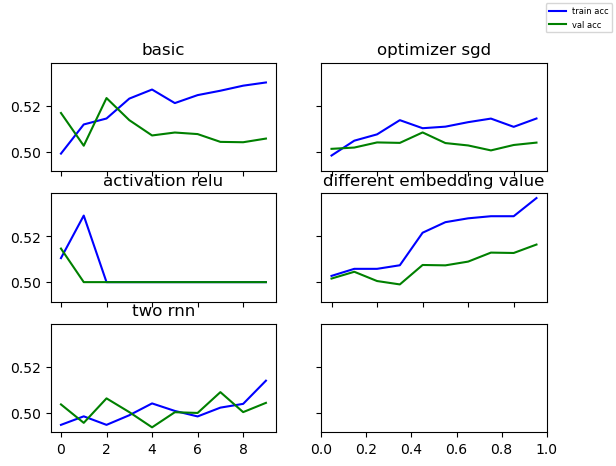

In [29]:
fig, ax = plt.subplots(3, 2,sharey='all')
fig.suptitle('')
ax[0,0].plot(history1.history['accuracy'], 'blue')
ax[0,0].plot(history1.history['val_accuracy'], 'green')
ax[0,0].set_title('basic')

ax[0,1].plot(history2.history['accuracy'], 'blue')
ax[0,1].plot(history2.history['val_accuracy'], 'green')
ax[0,1].set_title('optimizer sgd')
ax[1,0].plot(history3.history['accuracy'], 'blue')
ax[1,0].plot(history3.history['val_accuracy'], 'green')
ax[1,0].set_title('activation relu')
ax[1,1].plot(history4.history['accuracy'], 'blue')
ax[1,1].plot(history4.history['val_accuracy'], 'green')
ax[1,1].set_title('different embedding value')
ax[2,0].plot(history5.history['accuracy'], 'blue')
ax[2,0].plot(history5.history['val_accuracy'], 'green')
ax[2,0].set_title('two rnn')


fig.legend(['train acc', 'val acc'], fontsize=6)

for ax in fig.get_axes():
    ax.label_outer()

[Back to table of contents](#toc)